# Second hand car price 

**Problem Statement**
- Develop a machine learning model to predict the price of second-hand cars based on factors such as brand, mileage, fuel type, transmission, and other relevant features.The goal is to help buyers and sellers estimate fair market prices for used vehicles.

In [1]:
import numpy as np  # numpy for mathematical calculations
import pandas as pd   # pandas for loading dataset and data manipulation
import matplotlib.pyplot as plt  # matplotlib use to visulization
import seaborn as sns  # seaborn use for advance visulization

In [2]:
df=pd.read_csv("C:\\Users\\Abc\\Downloads\\cars.csv")
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [3]:
df.head() # To get first rows

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
df.tail() # to get last rows

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000
99,100,Tata,Altroz,2020,18000,Petrol,Manual,First,20,1199,85,5,600000


In [5]:
df.nunique() # unique value in data

Car_ID               100
Brand                 11
Model                 58
Year                   6
Kilometers_Driven     18
Fuel_Type              2
Transmission           2
Owner_Type             3
Mileage               15
Engine                36
Power                 40
Seats                  3
Price                 31
dtype: int64

In [6]:
df.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [8]:
df.describe(include='all') # summary of both numerical and categorical column

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,100.000000,100,100,100.00000,100.000000,100,100,100,100.000000,100.000000,100.000000,100.000000,1.000000e+02
unique,NaN,11,58,NaN,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,Mustang,NaN,NaN,Petrol,Automatic,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,3,NaN,NaN,52,57,44,NaN,NaN,NaN,NaN,NaN
mean,50.500000,NaN,NaN,2018.39000,28150.000000,NaN,NaN,NaN,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,NaN,NaN,1.17116,9121.375716,NaN,NaN,NaN,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,NaN,NaN,2016.00000,10000.000000,NaN,NaN,NaN,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,NaN,NaN,2017.75000,22000.000000,NaN,NaN,NaN,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,NaN,NaN,2018.00000,27000.000000,NaN,NaN,NaN,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,NaN,NaN,2019.00000,32000.000000,NaN,NaN,NaN,19.000000,2143.000000,187.000000,5.000000,2.500000e+06


In [9]:
df.duplicated().sum() # to get dulicate value in data set  

0

**The data set have does not contain any duplicate value.**

# EDA

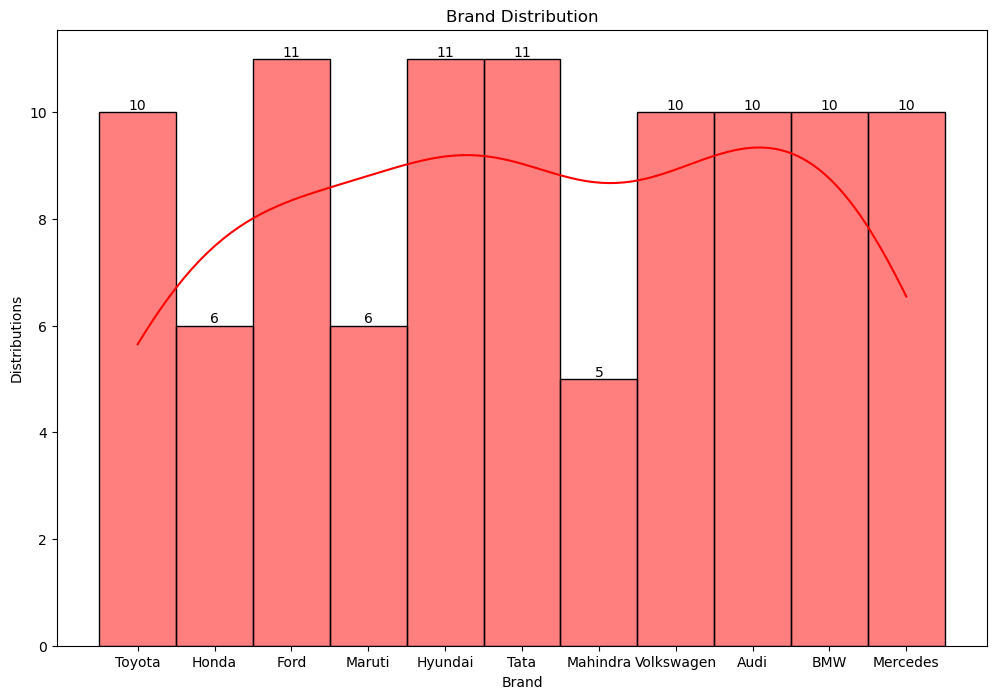

In [10]:
plt.figure(figsize=(12,8))
ax=sns.histplot(df['Brand'],bins=20,color='red',kde=True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Distributions')
plt.show()

**Brand distribution**
- Distribution is fairly distributed.
- The brand Ford, Hyundai and Tata are shows the highest distribution.
- The brand Toyota, volkswagen,Audi, BMW, Merecedes shows the little bit lowest distribution than above 3 brands.


C:\Users\Abc\AppData\Local\Temp\ipykernel_1920\1774726219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['Fuel_Type'],palette='Set2')


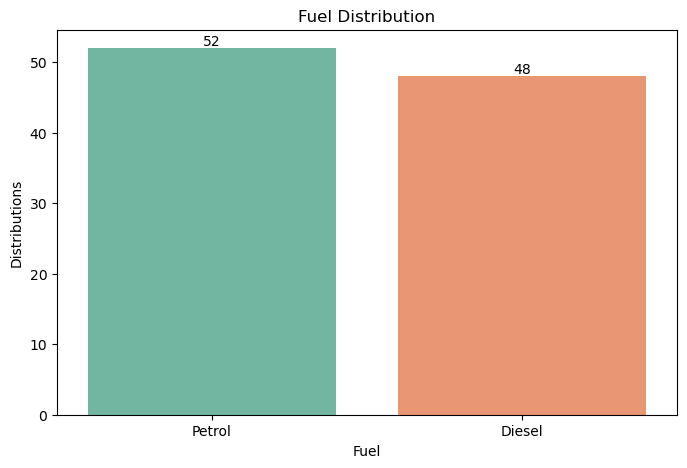

In [11]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['Fuel_Type'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Fuel Distribution')
plt.xlabel('Fuel')
plt.ylabel('Distributions')
plt.show()

**Fuel type distribution**
- The chart shows  count of petrol is grater than Diesel i.e 52.

C:\Users\Abc\AppData\Local\Temp\ipykernel_1920\3661091746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['Transmission'],palette='Set2')


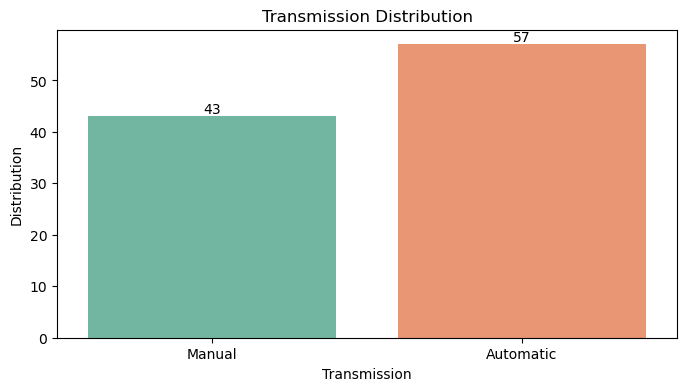

In [12]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x=df['Transmission'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Transmission Distribution')
plt.xlabel('Transmission')
plt.ylabel('Distribution')
plt.show()

**Transmission Distribution**
- The highest count is Automatic (57) i.e Automatic trasmission is more prevalent in the dataset.

C:\Users\Abc\AppData\Local\Temp\ipykernel_1920\2675634852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['Year'],palette='Set2')


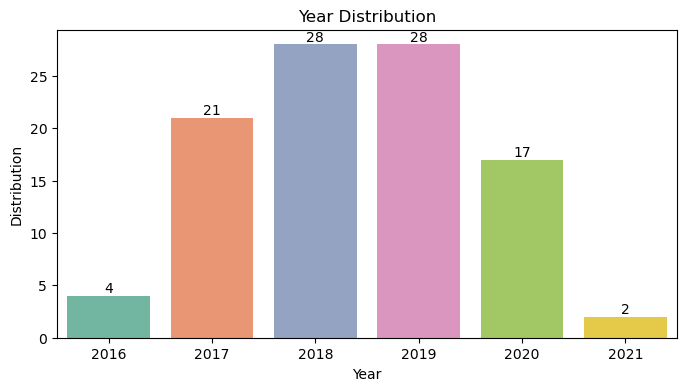

In [13]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x=df['Year'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Distribution')
plt.show()

**year Distribution**
-  In Years 2018 and 2019 show the highest number of distributions with 28 cars each.
- In Years 2016 and 2021 show the lowest number of distributions with 4 and 2 cars.

C:\Users\Abc\AppData\Local\Temp\ipykernel_1920\2185007189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['Owner_Type'],palette='Set2')


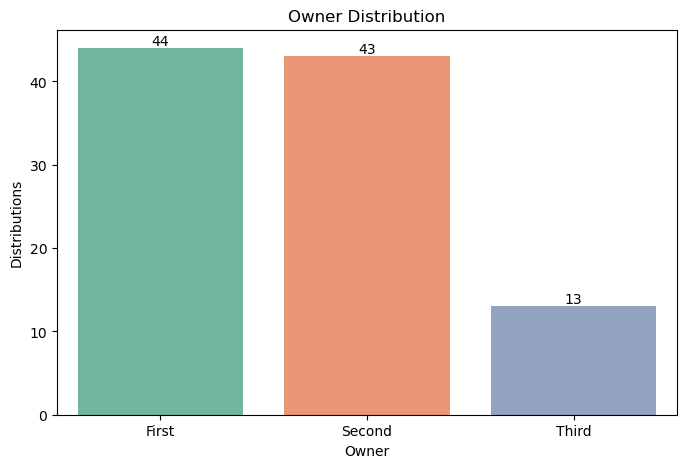

In [14]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['Owner_Type'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Owner Distribution')
plt.xlabel('Owner')
plt.ylabel('Distributions')
plt.show()

**Owner Type distribution**
- count of "First" (44) and "Second Owner"(43) are mostly equal.

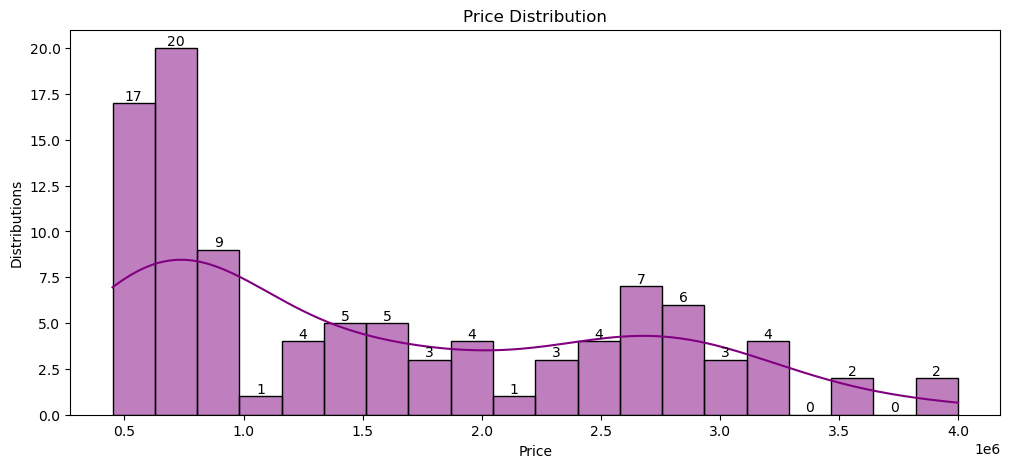

In [15]:
plt.figure(figsize=(12,5))
ax=sns.histplot(df['Price'],bins=20,color='purple',kde=True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Distributions')
plt.show()

**Price Distributions**
- The distribution appears to be positively skewed or right skewed.
- There are more cars at the lower price ranges.

C:\Users\Abc\AppData\Local\Temp\ipykernel_1920\1497379651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['Seats'],palette='Set2')


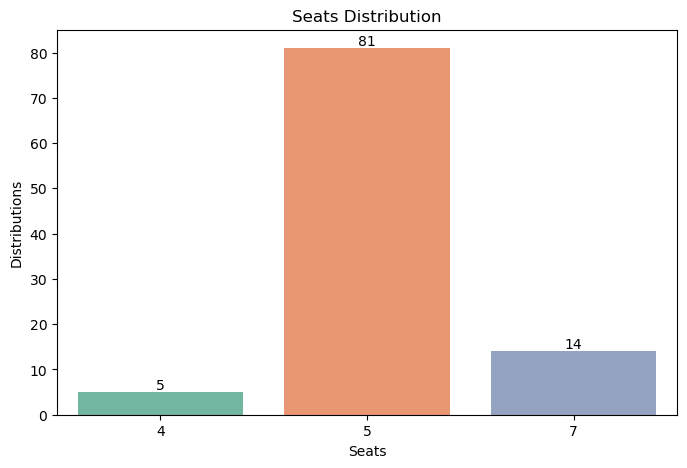

In [16]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['Seats'],palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Seats Distribution')
plt.xlabel('Seats')
plt.ylabel('Distributions')
plt.show()

**Seats Distribution**
- The count of 5 seats are greater than other seats.

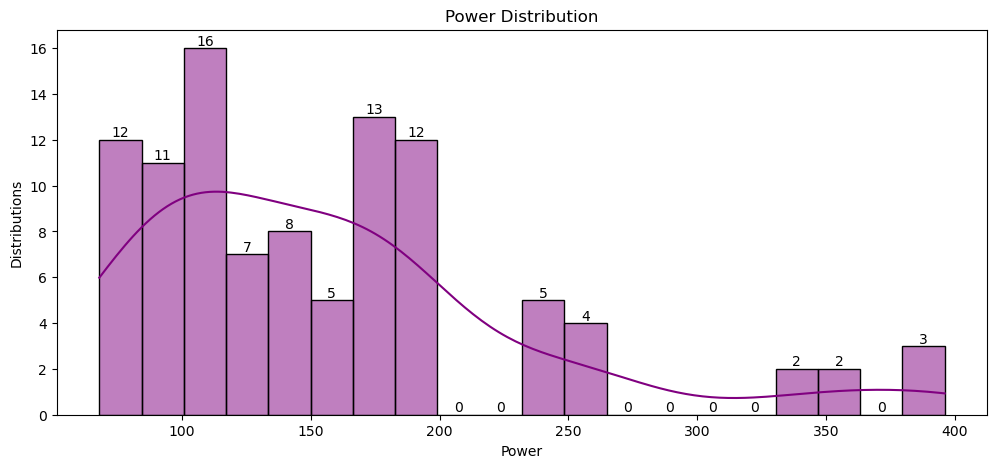

In [17]:
plt.figure(figsize=(12,5))
ax=sns.histplot(df['Power'],bins=20,color='purple',kde=True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Power Distribution')
plt.xlabel('Power')
plt.ylabel('Distributions')
plt.show()

**Power distribution**
- The area between the two peaks (around 100-150)has a relatively low frequency of cars.

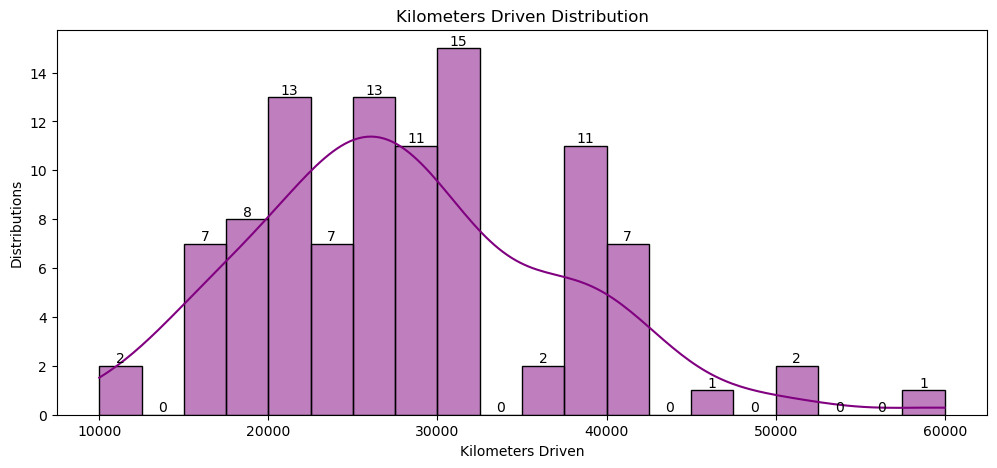

In [18]:
plt.figure(figsize=(12,5))
ax=sns.histplot(df['Kilometers_Driven'],bins=20,color='purple',kde=True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Kilometers Driven Distribution')
plt.xlabel('Kilometers Driven')
plt.ylabel('Distributions')
plt.show()

**Kilometers driven**
- The highest number of cars falls within the 20,000 to 30,000 kilometer range.
- There are a couple of gaps in the histogram specifically at 50000 and 60000 kilometers.

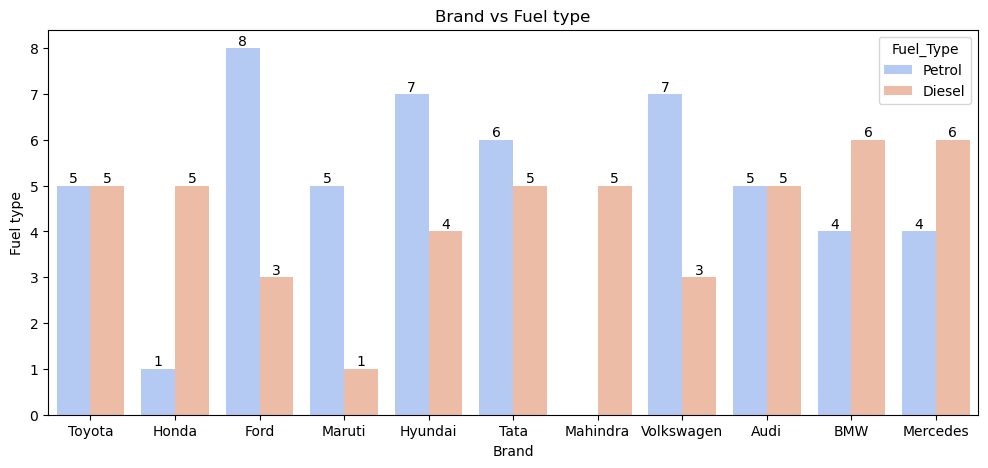

In [19]:
# brand vs fuel type
plt.figure(figsize=(12,5))
ax=sns.countplot(data=df, x='Brand',hue='Fuel_Type',palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Brand vs Fuel type')
plt.xlabel('Brand')
plt.ylabel('Fuel type')
plt.show()

# Univariate Analysis

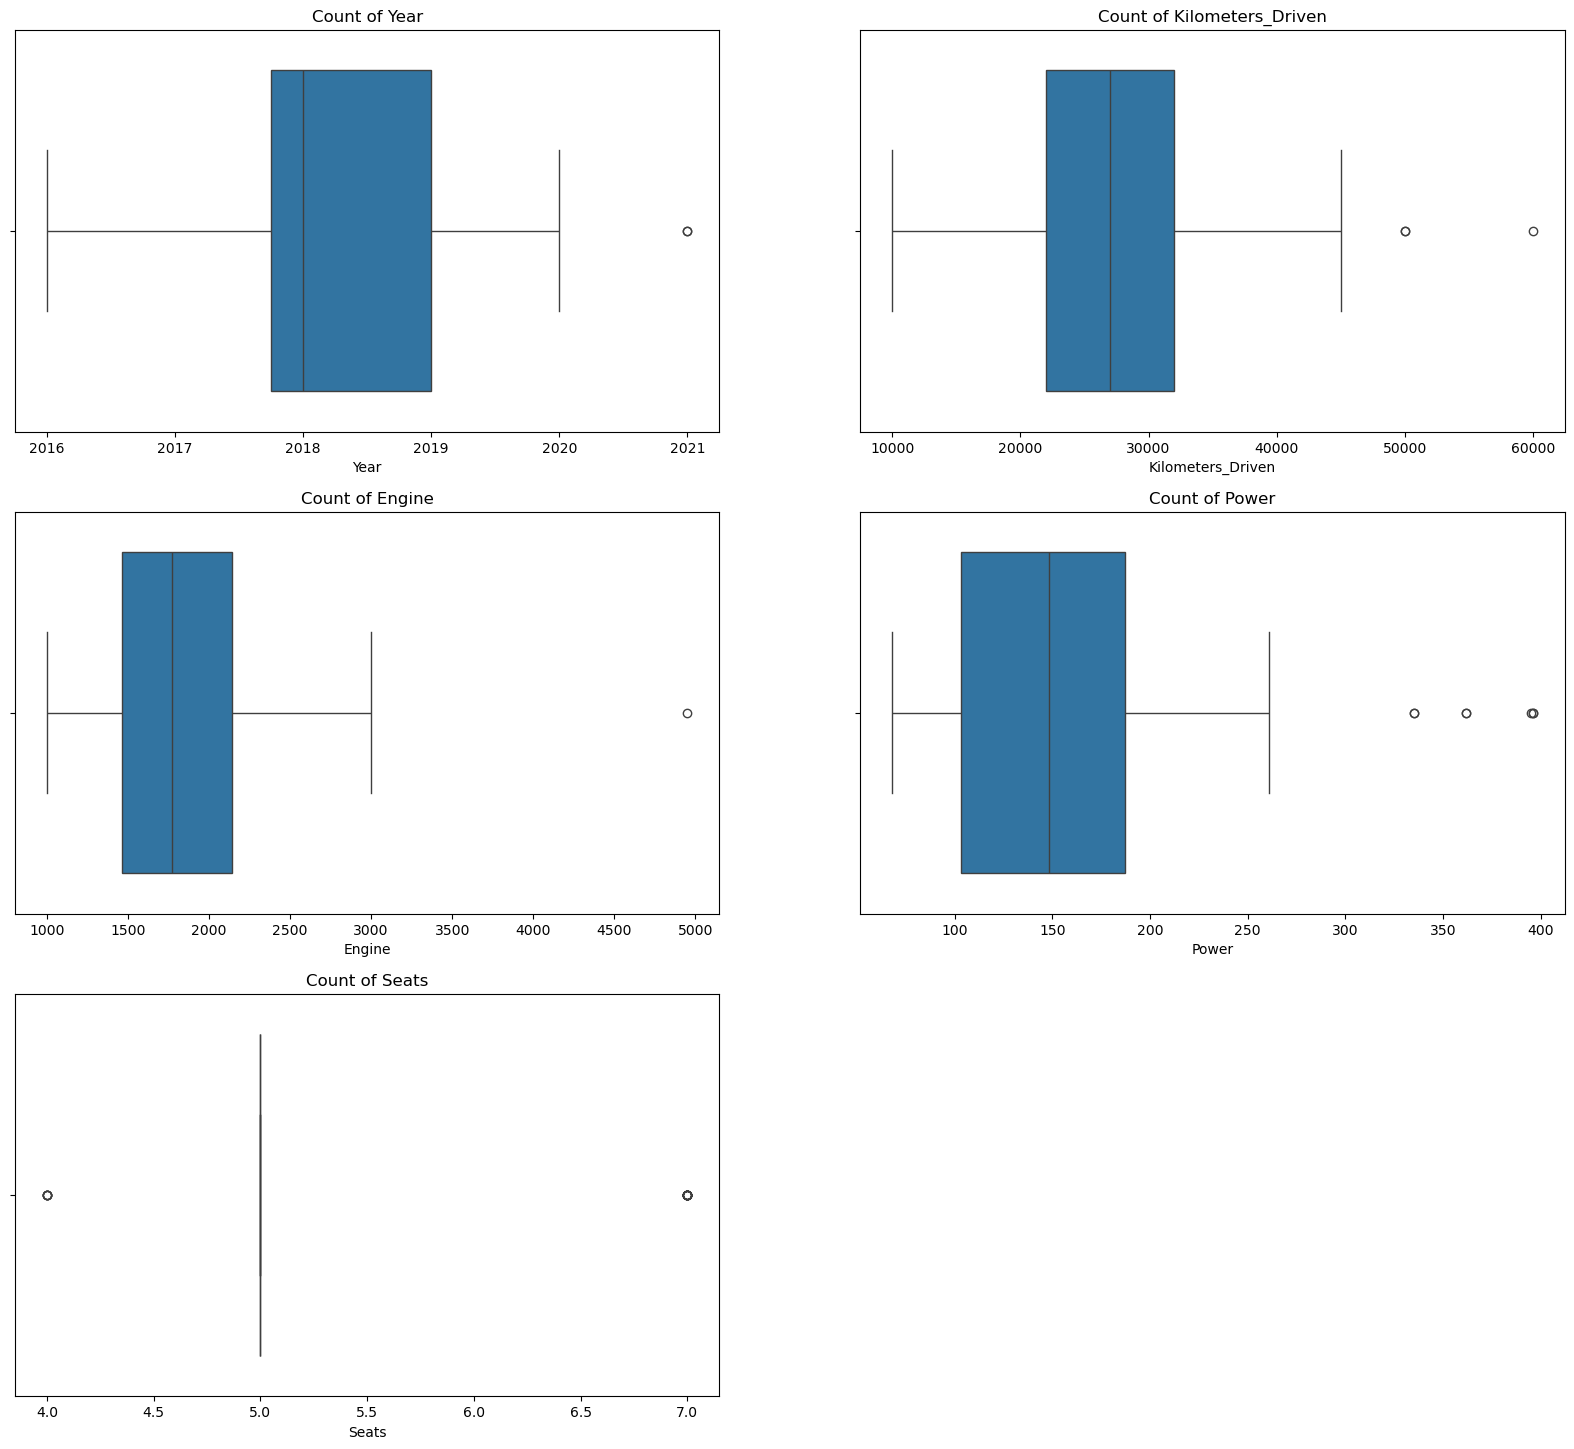

In [20]:
x=['Year','Kilometers_Driven','Engine','Power','Seats']
def univariate_analysis(n):
    plt.figure(figsize=(20, 24))
    for i, col in enumerate(n, 1):
        plt.subplot(4,2,i)
        plt.title(f"Count of {col}")
        sns.boxplot(x=df[col])
    plt.show()

univariate_analysis(x)

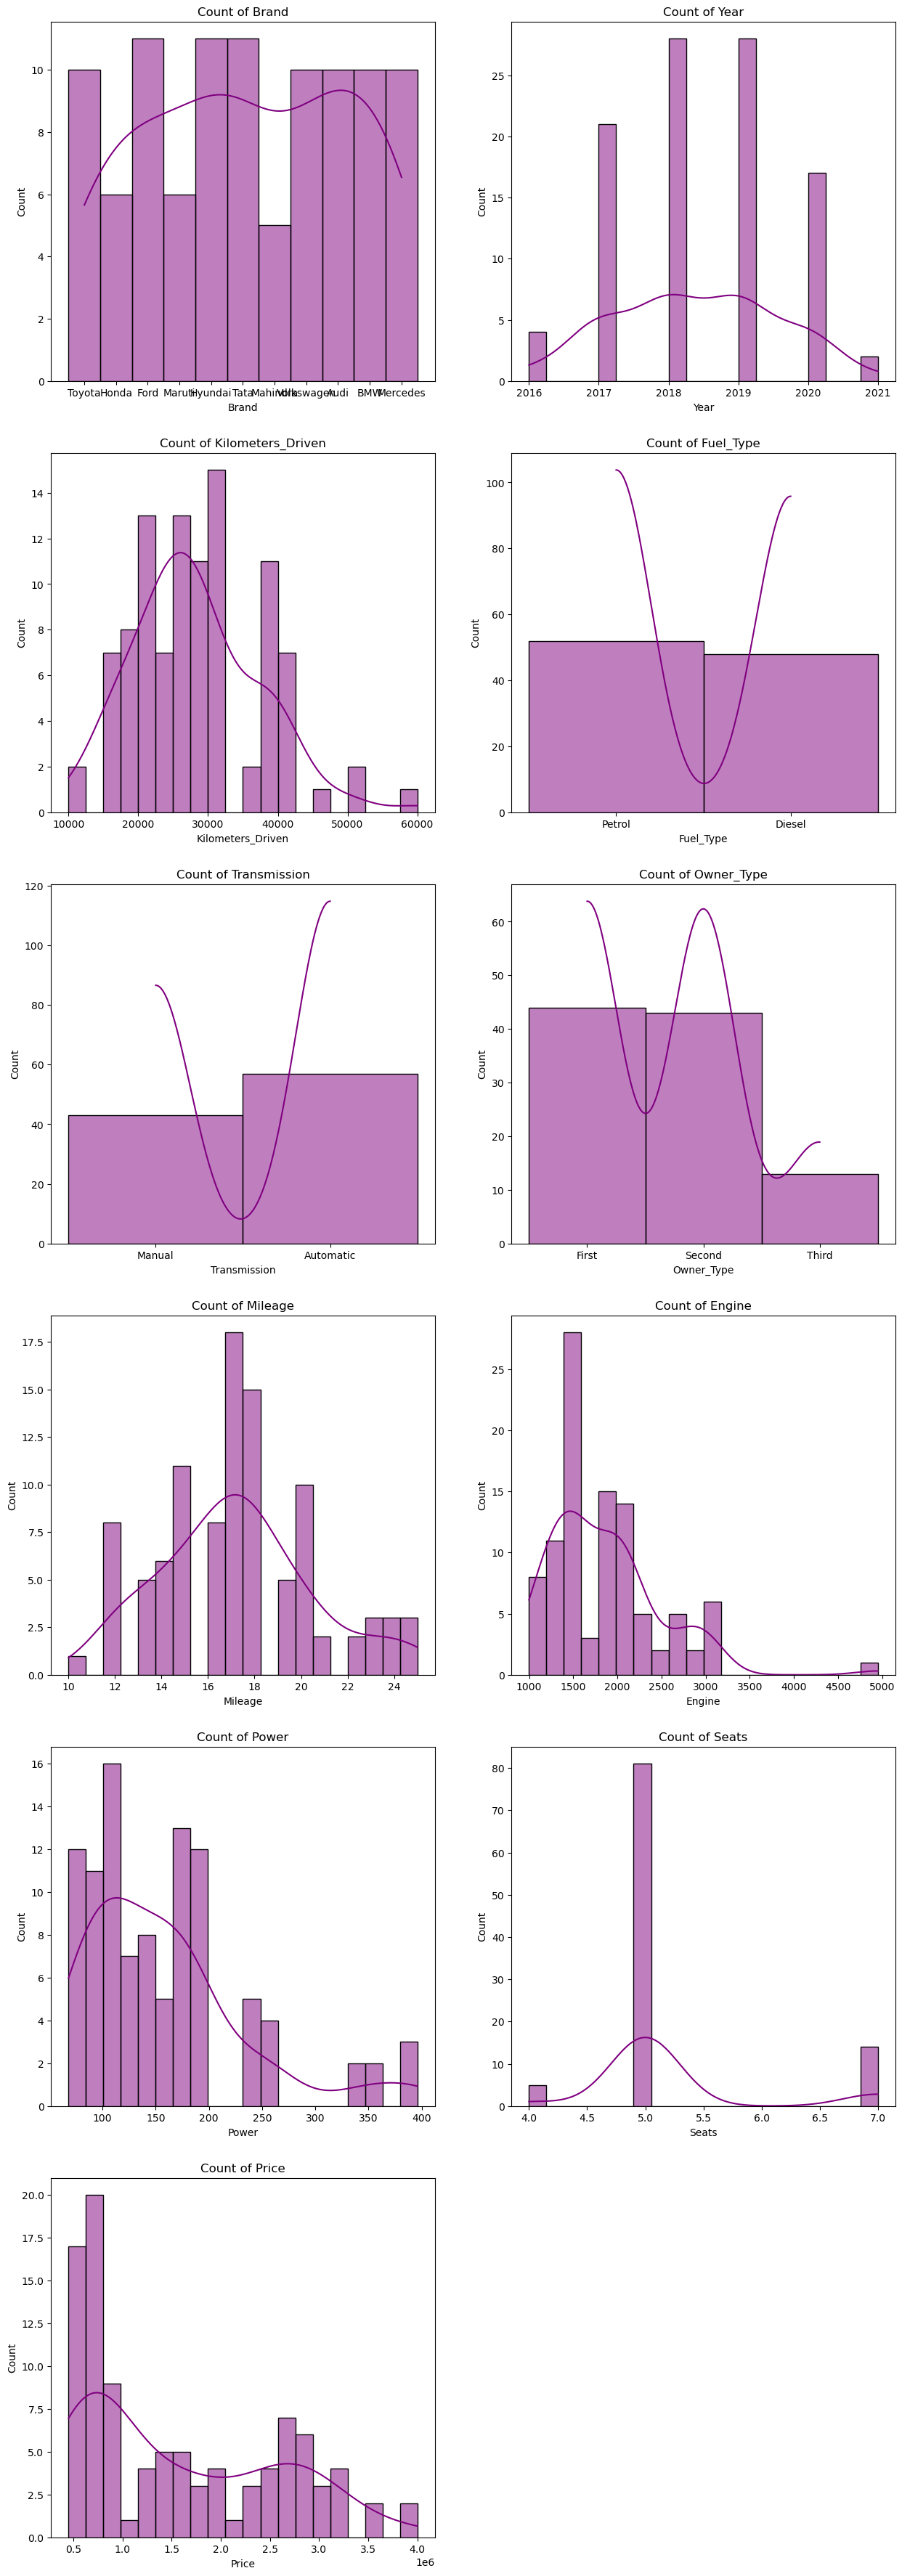

In [21]:
column=['Brand','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','Price']
def univariate_analysis(n):
    plt.figure(figsize=(15, 45))
    for i, col in enumerate(n, 1):
        plt.subplot(6,2,i)
        plt.title(f"Count of {col}")
        sns.histplot(x=df[col],bins=20,color='purple',kde=True)
    plt.show()

univariate_analysis(column)

**Brand**
- Ford and Hyundai and Tata have relatively similar and high count in this graph.
- volksswagen,Audi, BMW and Mercedes  is an equal range.

**Year**
- The years 2018 and 2019 have the highest counts.
- The 2016 and 2021 have lower counts compared to the peak years.

**kilometers_Driven**
  - The highest bars are in the 20,000 and 30,000 km indicating that most second hand cars in this dataset fall within these ranges.

**Fuel_Type**
- The count of petrol is greater than Diesel.

**Transmission**
- The highest count is Automatic (57) i.e Automatic trasmission is more prevalent in the dataset.

**Owner_Type**
- count of "First" (44) and "Second Owner"(43) are mostly equal.

**Mileage**
- The highest concentration of cars is between 16 and 18 miles.

**Engine**
- The most prominent peak (highest) is between 1500 and 2000.
- The distribution appears to be right skewed,with a long tail extending towards higher engine sizes.

**power**
- The area between the two peaks (around 100-150)has a relatively low frequency of cars.

**Seats**
- The count of 5 seats are greater than other seats.

**price**
- The distribution appears to be positively skewed or right skewed.
- There are more cars at the lower price ranges.

# Non Graphical Analysis

In [22]:
# to find unique in power
df['Power'].unique()

array([108, 140, 395,  74, 194,  76, 187, 190, 181, 158, 113, 167, 103,
        98, 141, 148, 241, 171,  94, 126,  85, 130, 174, 191, 150, 261,
       362, 106,  68,  69, 245, 335, 170, 176, 396,  81,  84, 115, 258,
       121], dtype=int64)

In [23]:
# to find unique value in seats
df['Seats'].unique()

array([5, 4, 7], dtype=int64)

In [24]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [25]:
# to get first 20 record whose fuel type is 'petrol'
df[df['Fuel_Type']=='Petrol'].head(20)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
5,6,Tata,Nexon,2019,35000,Petrol,Manual,First,17,1198,108,5,750000
7,8,Volkswagen,Polo,2020,25000,Petrol,Automatic,First,18,999,76,5,650000
10,11,Mercedes,C-Class,2018,28000,Petrol,Automatic,First,16,1991,181,5,2300000
12,13,Hyundai,Creta,2019,22000,Petrol,Manual,Third,16,1497,113,5,850000
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,850000
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1900000
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,2500000


In [26]:
df[df['Fuel_Type']=='Diesel'].head(20)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
6,7,Mahindra,Scorpio,2018,45000,Diesel,Automatic,Second,15,2179,140,7,900000
8,9,Audi,A4,2017,30000,Diesel,Automatic,First,18,1968,187,5,2200000
9,10,BMW,X1,2019,20000,Diesel,Automatic,Second,20,1995,190,5,2700000
11,12,Ford,Endeavour,2017,35000,Diesel,Automatic,Second,12,2198,158,7,2000000
13,14,Tata,Harrier,2018,40000,Diesel,Automatic,First,17,1956,167,5,1600000
15,16,Honda,City,2017,42000,Diesel,Manual,Second,25,1498,98,5,650000
16,17,Volkswagen,Tiguan,2018,32000,Diesel,Automatic,First,17,1968,141,5,1800000
18,19,BMW,5 Series,2019,24000,Diesel,Automatic,First,18,1995,187,5,3000000


In [27]:
# made new feature for indicating car age
df['Car_Age'] = 2025 - df['Year']
df['Car_Age']

0     7
1     6
2     8
3     5
4     9
     ..
95    6
96    8
97    7
98    6
99    5
Name: Car_Age, Length: 100, dtype: int64

In [28]:
# drop year column
df = df.drop(columns=['Year'])

In [29]:
# drop seats column
df = df.drop(columns=['Seats'])

In [30]:
df

,Car_ID,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Car_Age
0,1,Toyota,Corolla,50000,Petrol,Manual,First,15,1498,108,800000,7
1,2,Honda,Civic,40000,Petrol,Automatic,Second,17,1597,140,1000000,6
2,3,Ford,Mustang,20000,Petrol,Automatic,First,10,4951,395,2500000,8
3,4,Maruti,Swift,30000,Diesel,Manual,Third,23,1248,74,600000,5
4,5,Hyundai,Sonata,60000,Diesel,Automatic,Second,18,1999,194,850000,9
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,22000,Diesel,Automatic,First,16,1950,191,2900000,6
96,97,Toyota,Innova Crysta,38000,Diesel,Manual,Second,13,2755,171,1400000,8
97,98,Ford,EcoSport,26000,Petrol,Manual,Third,18,1497,121,750000,7
98,99,Hyundai,Verna,24000,Petrol,Automatic,Second,17,1497,113,850000,6


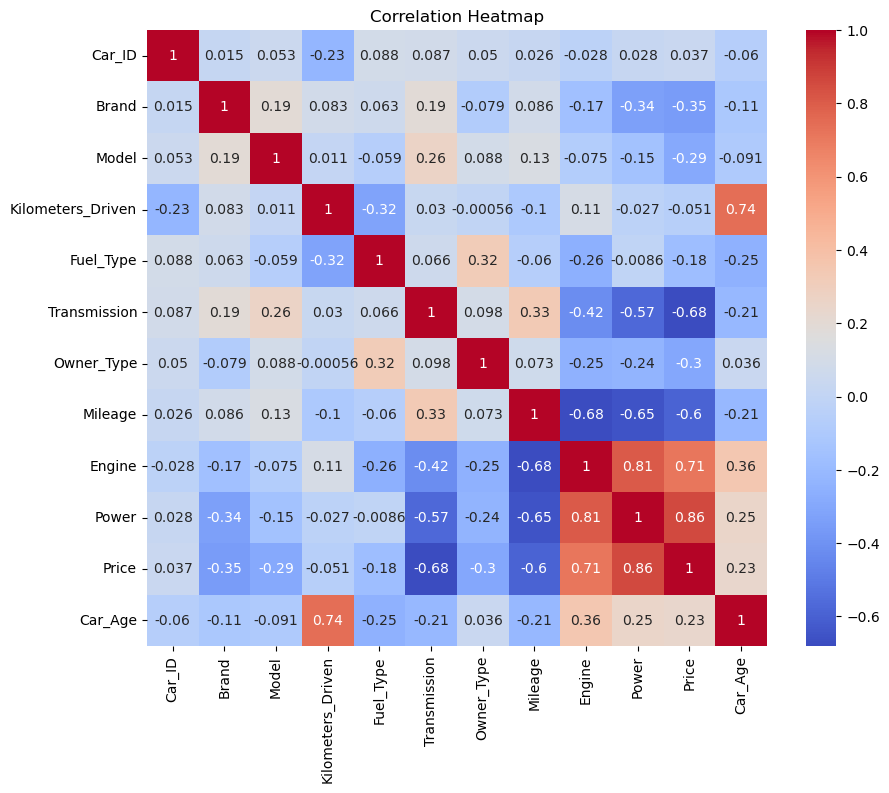

In [31]:
from sklearn.preprocessing import LabelEncoder
categorical_columns =["Brand", "Model", "Fuel_Type", "Transmission", "Owner_Type"] 

le= LabelEncoder()


for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap") 
plt.show()  

# Handle Outlier



# IQR (Inter Quartile Range)

In [49]:
Q1=df['Power'].quantile(0.25) # if data is 25% then it is Q1 

In [50]:
Q3=df['Power'].quantile(0.75) # if data is 75% then it is Q3

print(Q1,"\n",Q3) 

In [52]:
# IQR Finding
IQR=Q3-Q1
IQR

84.0

**Upper limit**

In [53]:
# finding upper limit
upper_limit=Q3+1.5*IQR  # formula for upper limit is Q3+1.5*IQR
print("Upper Limit ",upper_limit)

Upper Limit  313.0


**Lower limit**

In [54]:
# lower limit
lower_limit=Q1-1.5*IQR  # lower limit = Q1-1.5*IQR
print("Lower Limit",lower_limit)

Lower Limit -23.0


# Kurtosis
- kurtosis is a statistical measure that describe the shape of a distribution to its peak.
- It provide insights into the "tailedness" or extremity of data points.

# Types of kurtosis
- Mesokurtic (kurtosis = 3) : The distribution has a normal shape.
- Leptokurtic (kurtosis > 3) : The distribution has heavy tails and a sharp peak.and it indicate more extreme outlier than a normal distribution.
- platykurtic (kurtosis < 3) : The distribution has light tails and a flatter peak. and fewer extreme outliers compared to a normal distribution.

# Skewness
- Skewness measures the asymmetry of a distribution. It can indicate whether the data is symmetric, or skewed to the left or right
# Types of skewness
- Skewness = 0: Perfectly symmetric distribution (e.g., normal distribution).
- Positive Skewness ( > 0): The tail on the right side is longer, and the bulk of data is concentrated on the left.
- Negative Skewness ( < 0): The tail on the left side is longer, and the bulk of data is concentrated on the right.

In [32]:
from scipy.stats import skew,kurtosis
numerical_col=df.select_dtypes(include=['int64','object']).columns
skewness=df[numerical_col].apply(skew).rename("skewness")
kurtosis_value=df[numerical_col].apply(kurtosis).rename("kurtosis")
distributionmatrix=pd.concat([skewness,kurtosis_value],axis=1)  
distributionmatrix

,skewness,kurtosis
Car_ID,0.000000,-1.200240
Kilometers_Driven,0.611903,0.592353
Mileage,0.366971,-0.108923
Engine,1.529325,4.324270
Power,1.411690,1.814775
Price,0.605033,-0.953856
Car_Age,-0.001225,-0.719703


# ANOVA

# What is ANOVA?
- ANOVA stands for Analysis of Variance.
- ANOVA is a statistical test used to compare the means of two or more groups and determine if they are significantly different from each other.
- we can apply only categorical data.
- we can calculated by two methods:
 1.F-statistics : The ratio of variance between group to variance within groups.
 2.P_Value : Is the probability of obseving data no true differences between the group . if p_value < 0.05 i.e we reject the null hypothesis if p_value > 0.05 i.e fail to reject the null hypothesis.

# Types of ANOVA
1.ONE-WAY:
- There is only one independent variable and with more than two levels or groups.
2.TWO-WAY:
- Two-way ANOVA is two different categorical independent variables on one dependent variable.

In [33]:
from scipy.stats import f_oneway 
cat_features = ['Brand', 'Fuel_Type', 'Transmission', 'Owner_Type']

for feature in cat_features:
    groups = [df[df[feature] == category]['Price'] for category in df[feature].unique()]
    f_stat, p_value = f_oneway(*groups) #unpacks the list of groups into separate arguments for the function.
    
    print(f"ANOVA results for {feature}:")
    print(f" F-statistic: {f_stat:.2f}")
    print(f" P-value: {p_value:.4f}\n")

ANOVA results for Brand:
 F-statistic: 28.23
 P-value: 0.0000

ANOVA results for Fuel_Type:
 F-statistic: 3.32
 P-value: 0.0716

ANOVA results for Transmission:
 F-statistic: 82.69
 P-value: 0.0000

ANOVA results for Owner_Type:
 F-statistic: 8.31
 P-value: 0.0005



**Brand**
- F-Statistic :28.23
- p-value : 0.0000. i.e value is greater than 0.05 so it reject the null hypothesis.

**Fuel_Type**
- F-statistic: 3.32
- P-value: 0.0716. the value is greater than 0.05 so it fail to reject the null hypothesis.

**Transmission**
- F-statistic: 82.69
- P-value: 0.0000.i.e value is greater than 0.05 so it reject the null hypothesis.

**Owner_Type**
- F-statistic: 8.31
- P-value: 0.0005.the value is less than 0.05 so it reject the null hypothesis.

# classification

In [34]:
x = df.drop(columns=['Price'])
y = df['Price']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
classification_rep=classification_report(y_test,y_pred)
print("classification report:\n",classification_rep)

Accuracy: 0.55
classification report:
               precision    recall  f1-score   support

      500000       1.00      1.00      1.00         3
      600000       1.00      1.00      1.00         1
      650000       0.00      0.00      0.00         2
      700000       0.50      1.00      0.67         2
      750000       0.00      0.00      0.00         0
      800000       0.50      0.50      0.50         2
      850000       0.50      0.50      0.50         4
     1300000       1.00      1.00      1.00         1
     1600000       0.00      0.00      0.00         2
     2300000       0.00      0.00      0.00         1
     2700000       0.00      0.00      0.00         0
     2800000       0.00      0.00      0.00         0
     3000000       0.00      0.00      0.00         1
     4000000       1.00      1.00      1.00         1

    accuracy                           0.55        20
   macro avg       0.39      0.43      0.40        20
weighted avg       0.50      0.55      0.

C:\Users\Abc\Documents\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abc\Documents\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abc\Documents\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abc\Documents\ana\Lib\site-packag

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report

gbc_classifier=GradientBoostingClassifier(n_estimators=100,random_state=42)

gbc_classifier.fit(x_train,y_train)

y_pred=gbc_classifier.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

class_report=classification_report(y_test,y_pred)
print("Gradient boosting classifier's classification report\n:",class_report)

Accuracy 0.5
Gradient boosting classifier's classification report
:               precision    recall  f1-score   support

      500000       1.00      1.00      1.00         3
      600000       1.00      1.00      1.00         1
      650000       0.00      0.00      0.00         2
      700000       0.50      1.00      0.67         2
      750000       0.00      0.00      0.00         0
      800000       0.50      0.50      0.50         2
      850000       1.00      0.25      0.40         4
     1000000       0.00      0.00      0.00         0
     1300000       1.00      1.00      1.00         1
     1400000       0.00      0.00      0.00         0
     1600000       0.00      0.00      0.00         2
     2300000       0.00      0.00      0.00         1
     2800000       0.00      0.00      0.00         0
     2900000       0.00      0.00      0.00         0
     3000000       0.00      0.00      0.00         1
     4000000       1.00      1.00      1.00         1

    accuracy

C:\Users\Abc\Documents\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abc\Documents\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abc\Documents\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abc\Documents\ana\Lib\site-packag

In [38]:
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
#initialize 
knn_classifier=KNeighborsClassifier()

knn_classifier.fit(x_train,y_train)

y_pred=knn_classifier.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

classification_rep=classification_report(y_test,y_pred)
print("knn classifier's classification report\n:",classification_rep)

Accuracy 0.05
knn classifier's classification report
:               precision    recall  f1-score   support

      450000       0.00      0.00      0.00         0
      500000       0.25      0.33      0.29         3
      600000       0.00      0.00      0.00         1
      650000       0.00      0.00      0.00         2
      700000       0.00      0.00      0.00         2
      750000       0.00      0.00      0.00         0
      800000       0.00      0.00      0.00         2
      850000       0.00      0.00      0.00         4
     1300000       0.00      0.00      0.00         1
     1600000       0.00      0.00      0.00         2
     2300000       0.00      0.00      0.00         1
     2600000       0.00      0.00      0.00         0
     2800000       0.00      0.00      0.00         0
     3000000       0.00      0.00      0.00         1
     4000000       0.00      0.00      0.00         1

    accuracy                           0.05        20
   macro avg       0.02  

C:\Users\Abc\Documents\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abc\Documents\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abc\Documents\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abc\Documents\ana\Lib\site-packag

# Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_preddt=model.predict(x_test)

dt_metrics={'Mean Squared Error':mean_squared_error(y_test,y_preddt),
           'Root Mean Squared Error':np.sqrt(mean_squared_error(y_test,y_preddt)),
           'Mean Absolute Error':mean_absolute_error(y_test,y_preddt),
           'R Squared':r2_score(y_test,y_preddt)}

print(dt_metrics)

{'Mean Squared Error': 224000000000.0, 'Root Mean Squared Error': 473286.3826479693, 'Mean Absolute Error': 245000.0, 'R Squared': 0.7261111450755029}


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


model=LinearRegression()
model.fit(x_train, y_train)
y_pred_test=model.predict(x_test)#for evaluating test set
y_pred_train=model.predict(x_train)#for evaluating train set

#Evaluation Matrix
#now we are saving predictions
lr_metrics={'Test Mean Squared Error ':mean_squared_error(y_test,y_pred_test),
           'Test Root Mean Squared Error':np.sqrt(mean_squared_error(y_test,y_pred_test)),
           'Test Mean Absolute Error':mean_absolute_error(y_test,y_pred_test),
           'Test R Squared':r2_score(y_test,y_pred_test),
           'Train Mean Squared Error':mean_squared_error(y_train,y_pred_train),
           'Train Root Mean Squared Error':np.sqrt(mean_squared_error(y_train,y_pred_train)),
           'Train Mean Absolute Error':mean_absolute_error(y_train,y_pred_train),
           'Train R Squared':r2_score(y_train,y_pred_train)}
print(lr_metrics)

{'Test Mean Squared Error ': 215333015912.55756, 'Test Root Mean Squared Error': 464039.8861224728, 'Test Mean Absolute Error': 356871.4285947162, 'Test R Squared': 0.7367084234119246, 'Train Mean Squared Error': 139901629956.54993, 'Train Root Mean Squared Error': 374034.2630783307, 'Train Mean Absolute Error': 291823.2668700925, 'Train R Squared': 0.8579940189111903}


In [41]:
#multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


mlr=LinearRegression()
mlr.fit(x_train, y_train)
y_predmlr_test=mlr.predict(x_test)#for evaluating test set
y_predmlr_train=mlr.predict(x_train)#for evaluating train set

#Evaluation Matrix
#now we are saving predictions
mlr_metrics={'Test Mean Squared Error':mean_squared_error(y_test,y_predmlr_test),
           'Test Root Mean Squared Error':np.sqrt(mean_squared_error(y_test,y_predmlr_test)),
           'Test Mean Absolute Error':mean_absolute_error(y_test,y_predmlr_test),
           'Test R Squared':r2_score(y_test,y_predmlr_test),
           'Train Mean Squared Error':mean_squared_error(y_train,y_predmlr_train),
           'Train Root Mean Squared Error':np.sqrt(mean_squared_error(y_train,y_predmlr_train)),
           'Train Mean Absolute Error':mean_absolute_error(y_train,y_predmlr_train),
           'Train R Squared':r2_score(y_train,y_predmlr_train)}

print(mlr_metrics)

{'Test Mean Squared Error': 215333015912.55756, 'Test Root Mean Squared Error': 464039.8861224728, 'Test Mean Absolute Error': 356871.4285947162, 'Test R Squared': 0.7367084234119246, 'Train Mean Squared Error': 139901629956.54993, 'Train Root Mean Squared Error': 374034.2630783307, 'Train Mean Absolute Error': 291823.2668700925, 'Train R Squared': 0.8579940189111903}


In [42]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_predxgb_test=xgb.predict(x_test)
y_predxgb_train=xgb.predict(x_train)
xgb_metrics={'Test Mean Squared Error':mean_squared_error(y_test,y_predxgb_test),
           'Test Root Mean Squared Error':np.sqrt(mean_squared_error(y_test,y_predxgb_test)),
           'Test Mean Absolute Error':mean_absolute_error(y_test,y_predxgb_test),
           'Test R Squared':r2_score(y_test,y_predxgb_test),
           'Train Mean Squared Error':mean_squared_error(y_train,y_predxgb_train),
           'Train Root Mean Squared Error':np.sqrt(mean_squared_error(y_train,y_predxgb_train)),
           'Train Mean Absolute Error':mean_absolute_error(y_train,y_predxgb_train),
           'Train R Squared':r2_score(y_train,y_predxgb_train)}

print(xgb_metrics)

{'Test Mean Squared Error': 99634150533.87094, 'Test Root Mean Squared Error': 315648.77717784833, 'Test Mean Absolute Error': 164144.6671875, 'Test R Squared': 0.8781754970550537, 'Train Mean Squared Error': 0.14976806640625, 'Train Root Mean Squared Error': 0.38699879380464486, 'Train Mean Absolute Error': 0.298828125, 'Train R Squared': 1.0}


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_predrf_test=rf.predict(x_test)
y_predrf_train=rf.predict(x_train)
rf_metrics={'Test Mean Squared Error':mean_squared_error(y_test,y_predrf_test),
           'Test Root Mean Squared Error':np.sqrt(mean_squared_error(y_test,y_predrf_test)),
           'Test Mean Absolute Error':mean_absolute_error(y_test,y_predrf_test),
           'Test R Squared':r2_score(y_test,y_predrf_test),
           'Train Mean Squared Error':mean_squared_error(y_train,y_predrf_train),
           'Train Root Mean Squared Error':np.sqrt(mean_squared_error(y_train,y_predrf_train)),
           'Train Mean Absolute Error':mean_absolute_error(y_train,y_predrf_train),
           'Train R Squared':r2_score(y_train,y_predrf_train)}

print(rf_metrics)

{'Test Mean Squared Error': 125560425000.0, 'Test Root Mean Squared Error': 354345.06487321085, 'Test Mean Absolute Error': 194850.0, 'Test R Squared': 0.8464749954148071, 'Train Mean Squared Error': 9141565625.0, 'Train Root Mean Squared Error': 95611.53499970597, 'Train Mean Absolute Error': 60818.75, 'Train R Squared': 0.9907209301587906}


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_predgb_test=gb.predict(x_test)
y_predgb_train=gb.predict(x_train)
gb_metrics={'Test Mean Squared Error':mean_squared_error(y_test,y_predgb_test),
           'Test Root Mean Squared Error':np.sqrt(mean_squared_error(y_test,y_predgb_test)),
           'Test Mean Absolute Error':mean_absolute_error(y_test,y_predgb_test),
           'Test R Squared':r2_score(y_test,y_predgb_test),
           'Train Mean Squared Error':mean_squared_error(y_train,y_predgb_train),
           'Train Root Mean Squared Error':np.sqrt(mean_squared_error(y_train,y_predgb_train)),
           'Train Mean Absolute Error':mean_absolute_error(y_train,y_predgb_train),
           'Train R Squared':r2_score(y_train,y_predgb_train)}
gb_metrics

{'Test Mean Squared Error': 110679252845.37817,
 'Test Root Mean Squared Error': 332684.9152657484,
 'Test Mean Absolute Error': 161568.6259101246,
 'Test R Squared': 0.8646704739923236,
 'Train Mean Squared Error': 158272093.43647283,
 'Train Root Mean Squared Error': 12580.623730025187,
 'Train Mean Absolute Error': 9449.989288681118,
 'Train R Squared': 0.9998393472333782}

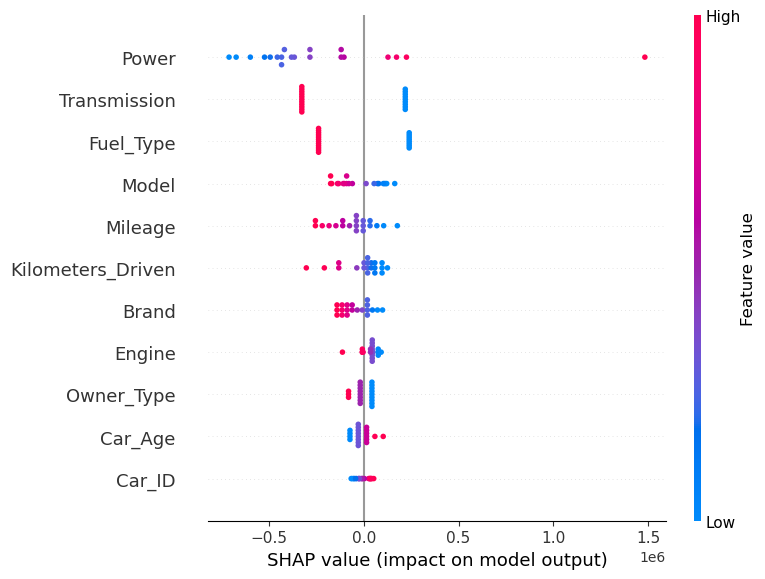

In [45]:
import shap
# create shap explainer for trained the model
explainer=shap.Explainer(model,x_train)
shap_values=explainer(x_test)  # shap_values for test data
#summary plot
shap.summary_plot(shap_values,x_test)

# Random Search

In [46]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Defining the parameter grid
param_dist = {
    'n_estimators': np.arange(100, 301, 50),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    scoring='neg_mean_absolute_error',
    n_iter=20,  # Number of random combinations to test
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters and best score
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert to positive
print("Best Parameters:", best_params)
print("Best MAE:", best_score)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.05}
Best MAE: 129532.39322177395


In [48]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

#initializing the XGBoost model
xgb_model=XGBRegressor(random_state=42)

#defining the parameter grid
param_grid={
    'learning_rate':[0.01,0.1],
    'max_depth':[3,5,7],
    'n_extimators':[100,200,300],
    'subsample':[0.5,1.0],
    'min_chile_weight':[1,3,5]
}

#performing GridSearchCV

grid_search=GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3, #3-fold cross-validation
    scoring='neg_mean_squared_error', #evvaluation metric
    verbose=2,
    n_jobs=-1
)

#fitting GridSearchCV
grid_search.fit(x_train,y_train)


#displaying the best parameters
print("Best parameters:",grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_chile_weight': 1, 'n_extimators': 100, 'subsample': 0.5}


C:\Users\Abc\Documents\ana\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:00:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_chile_weight", "n_extimators" } are not used.

  warnings.warn(smsg, UserWarning)


# Model Deployment

In [ ]:
import pickle
with open("Secong Hand Car price.pkl", "wb") as f:
    pickle.dump(model, f)